In [1]:
import cv2
import numpy as np
import dlib
from math import hypot
import matplotlib.pyplot as plt

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("E:/eye_blink_detection/shape_predictor_68_face_landmarks.dat")

5.8552111191335054


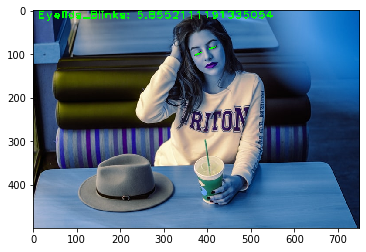

In [3]:
def midpoint(p1 ,p2):
    return int((p1.x + p2.x)/2), int((p1.y + p2.y)/2)

font = cv2.FONT_HERSHEY_PLAIN

def get_blinking_ratio(eye_points, facial_landmarks):
    left_point = (facial_landmarks.part(eye_points[0]).x, facial_landmarks.part(eye_points[0]).y)
    right_point = (facial_landmarks.part(eye_points[3]).x, facial_landmarks.part(eye_points[3]).y)
    center_top = midpoint(facial_landmarks.part(eye_points[1]), facial_landmarks.part(eye_points[2]))
    center_bottom = midpoint(facial_landmarks.part(eye_points[5]), facial_landmarks.part(eye_points[4]))

    hor_line = cv2.line(frame, left_point, right_point, (0, 255, 0), 2)
    ver_line = cv2.line(frame, center_top, center_bottom, (0, 255, 0), 2)

    hor_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    ver_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))

    ratio = hor_line_lenght / ver_line_lenght
    #ratio=ver_line_lenght
    return ratio

#cap = cv2.VideoCapture(0)
#while True:
#_, frame = cap.read()
frame=cv2.imread("E:/eye_blink_detection/blink_image/new_4.JFIF")
#print(frame)
#frame=cv2.resize(frame,(400,400))
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

faces = detector(gray)
for face in faces:
        #x, y = face.left(), face.top()
        #x1, y1 = face.right(), face.bottom()
        #cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

    landmarks = predictor(gray, face)
    #print(landmarks)
    left_eye_ratio = get_blinking_ratio([36, 37, 38, 39, 40, 41], landmarks)
    right_eye_ratio = get_blinking_ratio([42, 43, 44, 45, 46, 47], landmarks)
    blinking_ratio = (left_eye_ratio + right_eye_ratio) / 2
    print(blinking_ratio)
    if blinking_ratio>4:
        cv2.putText(frame, "Eyelids_Blinks: {}".format(blinking_ratio), (10, 20), font,1.8, (0, 255, 0),2)
        #if blinking_ratio<5.7:
            #cv2.putText(frame, "Eyelids_open", (50, 150), font,2, (255, 0, 0),2)
    plt.imshow(frame) 

#cv2.imshow("Frame", frame)

#key = cv2.waitKey(1)
#if key == 27:
    #break
